In [533]:
import pandas as pd
import math

In [534]:
df = pd.read_csv("data_mlr.csv")

In [535]:
ori = df.drop(columns=['Student_ID', 'Score']).values.tolist()

In [536]:
#df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [537]:
split_index = int(len(df) * 0.8)

In [538]:
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

In [539]:
X_train = train_df.drop(columns=['Student_ID', 'Score']).values.tolist()
y_train = train_df['Score'].tolist()

X_test = test_df.drop(columns=['Student_ID', 'Score']).values.tolist()
y_test = test_df['Score'].tolist()

print(f"Training on {len(X_train)} students, testing on {len(X_test)}.")

Training on 56 students, testing on 14.


In [540]:
def compute_stats(X):

    means = [0.0] * len(X[0])
    std = [0.0] * len(X[0]) 

    for j in range(len(X[0])):
        for i in range(len(X)):
            means[j] += X[i][j]
        means[j] /= len(X)

    #calc STD
    for j in range(len(X[0])):
        for i in range(len(X)):
            std[j] += math.pow(X[i][j] - means[j],2)
        std[j] /= len(X)
        std[j] = math.sqrt(std[j])
    return means , std

In [541]:
def normalization(X, means, std):
    #update all values
    for i in range(len(X)):
        for j in range(len(X[0])):
            X[i][j] = (X[i][j] - means[j]) / std[j]
    
    return X

In [542]:
means, std = compute_stats(X_train)
X = normalization(X_train, means, std)
X_test = normalization(X_test, means, std)
Y = y_train

In [543]:
m = [0.0]*4
c = 0.0
lr = 0.01

In [544]:
def dot(X,dm):
    p = 0
    for i in range(len(X)):
        p += X[i] * dm[i]
    return p

In [545]:
def grad(X,m,Y,c):
    e = Y - (dot(X,m) + c)
    #print(e)
    delc = e
    dm = [0.0]*len(m)
    for i in range(len(m)):
        dm[i] = X[i] * e
        #print(dm[i])
    return delc, dm

In [546]:
def mse(X, Y, w, b):
    total = 0
    for i in range(len(X)):
        y_pred = dot(X[i], w) + b
        total += (Y[i] - y_pred) ** 2
    return total / len(X)


In [547]:
epoch = 1000
for _ in range(epoch):
    delc = 0.0
    delm = [0.0]*4
    for i in range(len(X)):
        dc, w = grad(X[i],m, Y[i],c)
        delc += dc
        for j in range(len(w)):
            delm[j] += w[j]
    delc = -2/len(X) * delc
    c -= lr*delc
    #print(delm)
    for k in range(len(m)):
        delm[k] *= -2/len(X)
        #m[k] -= lr*delm[k]
    for j in range(len(m)):
        m[j] -= lr * delm[j]
    
    if _ % 100 == 0:
        print("Loss:", mse(X, Y, m, c))



Loss: 5657.268007245916
Loss: 103.04539050094859
Loss: 4.894017657069354
Loss: 2.3642887968883994
Loss: 2.0992110486643982
Loss: 2.0101638184782105
Loss: 1.9683191881562574
Loss: 1.9447528145752515
Loss: 1.9293603167772708
Loss: 1.9181214324270341


In [548]:
print(m,c)

[5.9813382044744525, 10.909899748349556, 2.3606339612147775, 3.084344452902176] 74.94642844529619


In [549]:
y_pred = [0.0]*len(X)

In [550]:
for i in range(len(X)):
    t = 0.0
    for j in range(len(m)):
        t+= m[j] * X[i][j]
    t+=c
    y_pred[i] = t

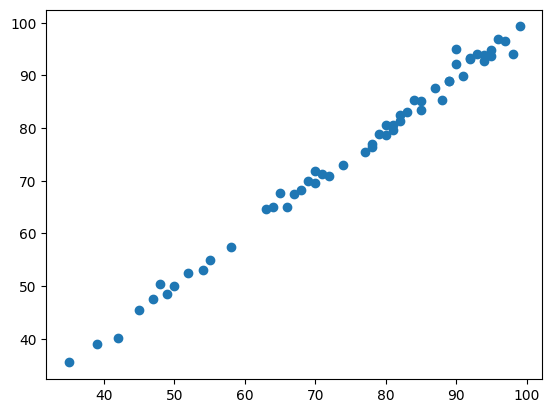

In [551]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(Y,y_pred)
plt.show()

In [552]:
#MSE
mse = 0.0
for i in range(len(Y)):
    mse += math.pow(Y[i] - y_pred[i],2)
mse = mse/len(Y)
print(f"MSE: {mse}")

MSE: 1.9093925201267088


In [553]:
#RMSE
rmse = math.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 1.3818077001257116


In [554]:
mae = 0.0
for i in range(len(Y)):
    mae += abs(Y[i] - y_pred[i])
mae = mae/len(Y)
print(f"MAE: {mae}")

MAE: 1.0035734390746216


In [555]:
#R^2

y_mean = sum(Y)/len(Y)

SS_r = 0.0
for i in range(len(Y)):
    SS_r += math.pow(Y[i] - y_pred[i],2)

ss_t = 0.0
for i in range(len(Y)):
    ss_t += math.pow(Y[i] - y_mean,2)

R_2 = 1 - (SS_r/ss_t) 
print(f"R2: {R_2}")

R2: 0.9935183959014688


In [556]:
#Test data scores
y_pred = [0.0]*len(X_test)
for i in range(len(X_test)):
    t = 0.0
    for j in range(len(m)):
        t+= m[j] * X_test[i][j]
    t+=c
    y_pred[i] = t

#MSE
mse = 0.0
for i in range(len(y_test)):
    mse += math.pow(y_test[i] - y_pred[i],2)
mse = mse/len(y_test)
print(f"MSE: {mse}")

#RMSE
rmse = math.sqrt(mse)
print(f"RMSE: {rmse}")

#MAE
mae = 0.0
for i in range(len(y_test)):
    mae += abs(y_test[i] - y_pred[i])
mae = mae/len(y_test)
print(f"MAE: {mae}")

#R^2
y_mean = sum(y_test)/len(y_test)

SS_r = 0.0
for i in range(len(y_test)):
    SS_r += math.pow(y_test[i] - y_pred[i],2)

ss_t = 0.0
for i in range(len(y_test)):
    ss_t += math.pow(y_test[i] - y_mean,2)

R_2 = 1 - (SS_r/ss_t) 
print(f"R2: {R_2}")

MSE: 3.4092781919323163
RMSE: 1.8464230804266708
MAE: 1.2795691167785184
R2: 0.9857559147847302
